# Imports 

# Data Imports

In [ ]:
# %%capture
!gdown https://ese224.seas.upenn.edu/wp-content/uploads/2021/04/lab12data.zip
!unzip -o lab12data.zip
dictionary = pkl.load(open('lab12data/graph_sp_data.pkl', 'rb'))
A = dictionary['A']
x1 = dictionary['x1']
x2 = dictionary['x2']
x3 = dictionary['x3']
y = dictionary['y']

Downloading...
From: https://ese224.seas.upenn.edu/wp-content/uploads/2021/04/lab12data.zip
To: /content/lab12data.zip
100% 3.08k/3.08k [00:00<00:00, 4.68MB/s]
Archive:  lab12data.zip
   creating: lab12data/
  inflating: lab12data/graph_sp_data.pkl  
  inflating: lab12data/README.txt    


# Section 2.1

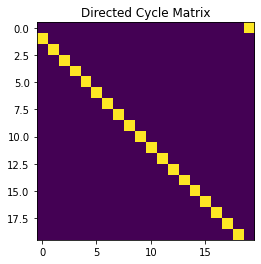

In [ ]:
class matrix:
  def __init__(self,N):
    self.N=N

class directCycle(matrix):
  def __init__(self,N):
    super().__init__(N)
    self.A=np.tril(np.ones((self.N,self.N)),-1)-np.tril(np.ones((self.N,self.N)),-2)
    self.A[0,self.N-1] = 1

class fourier(matrix):
  def __init__(self,N):
    super().__init__(N)
    self.F=np.outer(np.arange(self.N),np.arange(self.N))
    self.F=(1/np.sqrt(N))*np.exp(2j*cmath.pi*self.F / self.N)

if __name__ == '__main__':
  N = 20

  dirCyc=directCycle(N)
  plt.imshow(dirCyc.A)
  plt.title('Directed Cycle Matrix')
  plt.savefig('LAB12_directedCycleMatrix.png')

# Section 2.2 

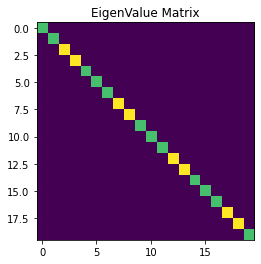

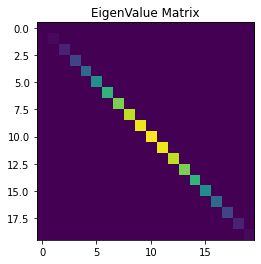

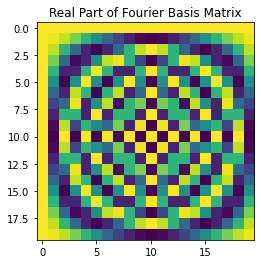

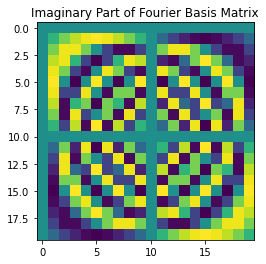

In [ ]:
if __name__ == '__main__':
    plt.figure()
    four = fourier(N)
    plt.imshow(np.abs(np.round(np.conjugate(four.F)@dirCyc.A@four.F)))
    plt.title('EigenValue Matrix')

    plt.figure()
    S2 = np.add(np.diag(sum((dirCyc.A+dirCyc.A.T))) ,  -1*(dirCyc.A+dirCyc.A.T) )
    plt.imshow(np.abs((np.conjugate(four.F) @ S2 @ four.F)))
    plt.title('EigenValue Matrix')

    plt.figure()
    four = fourier(N)
    plt.imshow(np.real(four.F))
    plt.title('Real Part of Fourier Basis Matrix')

    plt.figure()
    four =fourier(N)
    plt.imshow(np.imag(four.F))
    plt.title('Imaginary Part of Fourier Basis Matrix')

# Section 3.1

In [ ]:
class GFT:
    def __init__(self,S):
        self.S=S
        [self.eigs,self.V]=np.linalg.eig(S)
        self.V=self.V[:,np.argsort(self.eigs)]
        self.eigs=np.sort(self.eigs)
        self.Lambda=np.diag(self.eigs)

    def computeGFT(self,x,k=None):
        xt=np.conj(self.V.T) @ x
        if k==None:
            return xt
        else:
            xtk = np.zeros_like(xt)
            xtk[np.argsort(np.abs(xt[:, 0]))[-k:], 0] = xt[np.argsort(np.abs(xt[:, 0]))[-k:], 0]
            return xtk

    def computeiGFT(self,xt, k=None):
        if k==None:
            return self.V@xt
        else:
            return self.V[:,np.argsort(np.abs(xt[:,0]))[-k:]]@xt[np.argsort(np.abs(xt[:,0]))[-k:],0]

    def computeTotalVariation(self,x):
        return x.T@(self.S)@x

# Section 3.2


The multiplicity is: 1


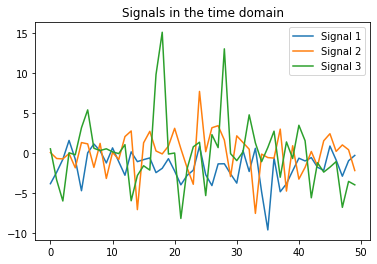

In [ ]:
if __name__ == '__main__':
  L = np.add(np.diag(sum(A)) ,  -1*A) # Compute laplacian
  p32=GFT(L)
  print('The multiplicity is:', np.sum( np.abs(p32.eigs) < (10**(-10))))
  plt.figure()
  plt.plot(x1)
  plt.plot(x2)
  plt.plot(x3)
  plt.legend(['Signal 1', 'Signal 2', 'Signal 3'])
  plt.title('Signals in the time domain')
  plt.savefig('LAB12_signals_time.png')

# Section 3.3

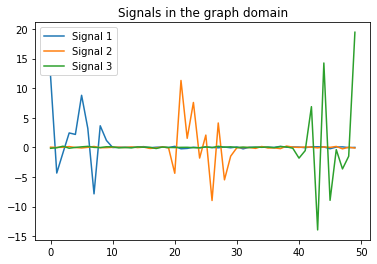

In [ ]:
if __name__ == '__main__':
  x1t = p32.computeGFT(x1)
  x2t = p32.computeGFT(x2)
  x3t = p32.computeGFT(x3)
  plt.figure()
  plt.plot(x1t)
  plt.plot(x2t)
  plt.plot(x3t)
  plt.legend(['Signal 1', 'Signal 2', 'Signal 3'])
  plt.title('Signals in the graph domain')
  plt.savefig('LAB12_signals_graph.png')

# Section 3.4

In [ ]:
if __name__ == '__main__':
  print('The Total Variation of Signal 1 is:',p32.computeTotalVariation(x1))
  print('The Total Variation of Signal 2 is:',p32.computeTotalVariation(x2))
  print('The Total Variation of Signal 3 is:',p32.computeTotalVariation(x3))

The Total Variation of Signal 1 is: [[241.79931345]]
The Total Variation of Signal 2 is: [[1385.61080034]]
The Total Variation of Signal 3 is: [[8761.27684875]]


# Section 3.5

In [ ]:
# See GFT class for iGFT 

# Section 3.6 

The reconstruction error of signal 1 is: 1.5785639046731885e-13
The reconstruction error of signal 2 is: 1.0950317078400475e-13
The reconstruction error of signal 3 is: 1.2907935076486287e-13
The reconstruction error of signal 1 with k=  5 coeffcients is: 135.21348969408157
The reconstruction error of signal 2 with k=  5 coeffcients is: 181.52168845599255
The reconstruction error of signal 3 with k=  5 coeffcients is: 302.0573129902563


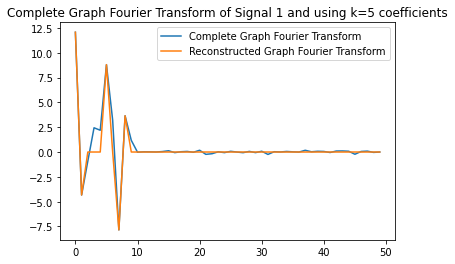

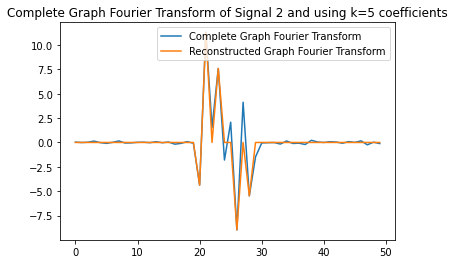

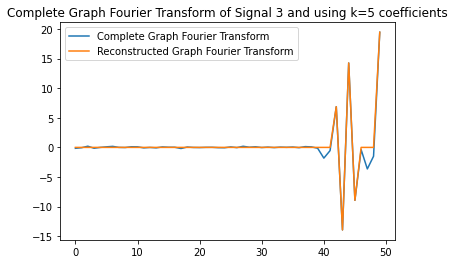

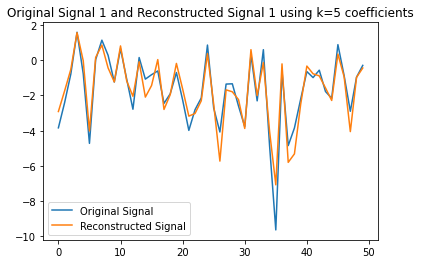

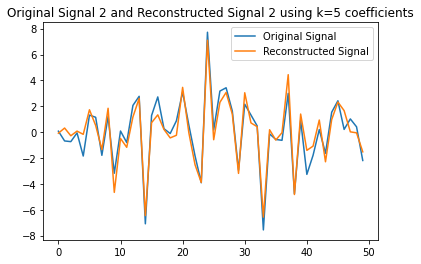

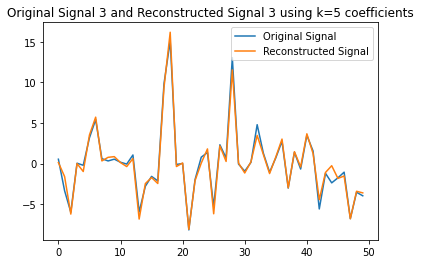

In [ ]:
if __name__ == '__main__':
  print('The reconstruction error of signal 1 is:',np.linalg.norm(x1-p32.computeiGFT(p32.computeGFT(x1))))
  print('The reconstruction error of signal 2 is:',np.linalg.norm(x2-p32.computeiGFT(p32.computeGFT(x2))))
  print('The reconstruction error of signal 3 is:',np.linalg.norm(x3-p32.computeiGFT(p32.computeGFT(x3))))

if __name__ == '__main__':
  k=5
  print('The reconstruction error of signal 1 with k= ', k, 'coeffcients is:', np.linalg.norm(x1 - p32.computeiGFT(x1t,k)))
  print('The reconstruction error of signal 2 with k= ', k, 'coeffcients is:', np.linalg.norm(x2 - p32.computeiGFT(x2t,k)))
  print('The reconstruction error of signal 3 with k= ', k, 'coeffcients is:', np.linalg.norm(x3 - p32.computeiGFT(x3t,k)))

  plt.figure()
  plt.plot(p32.computeGFT(x1))
  plt.plot(p32.computeGFT(x1,k))
  plt.legend(['Complete Graph Fourier Transform', 'Reconstructed Graph Fourier Transform'])
  plt.title('Complete Graph Fourier Transform of Signal 1 and using k=%d coefficients' % k)

  plt.figure()
  plt.plot(p32.computeGFT(x2))
  plt.plot(p32.computeGFT(x2,k))
  plt.legend(['Complete Graph Fourier Transform', 'Reconstructed Graph Fourier Transform'])
  plt.title('Complete Graph Fourier Transform of Signal 2 and using k=%d coefficients' % k)

  plt.figure()
  plt.plot(p32.computeGFT(x3))
  plt.plot(p32.computeGFT(x3, k))
  plt.legend(['Complete Graph Fourier Transform', 'Reconstructed Graph Fourier Transform'])
  plt.title('Complete Graph Fourier Transform of Signal 3 and using k=%d coefficients' % k)

  #
  plt.figure()
  plt.plot(x1)
  plt.plot(p32.computeiGFT(p32.computeGFT(x1),k))
  plt.legend(['Original Signal','Reconstructed Signal'])
  plt.title('Original Signal 1 and Reconstructed Signal 1 using k=%d coefficients'%k)

  plt.figure()
  plt.plot(x2)
  plt.plot(p32.computeiGFT(p32.computeGFT(x2),k))
  plt.legend(['Original Signal','Reconstructed Signal'])
  plt.title('Original Signal 2 and Reconstructed Signal 2 using k=%d coefficients'%k)

  plt.figure()
  plt.plot(x3)
  plt.plot(p32.computeiGFT(p32.computeGFT(x3),k))
  plt.legend(['Original Signal','Reconstructed Signal'])
  plt.title('Original Signal 3 and Reconstructed Signal 3 using k=%d coefficients'%k)

# Section 3.7

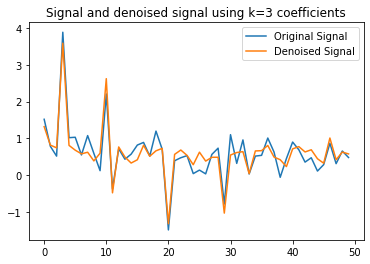

In [ ]:
if __name__ == '__main__':
  yt=p32.computeGFT(y)
  yr=p32.computeiGFT(yt,3)
  plt.figure()
  plt.plot(y)
  plt.plot(yr)
  plt.legend(['Original Signal','Denoised Signal'])
  plt.title('Signal and denoised signal using k=3 coefficients')
  # plt.show()